In [1]:
import numpy as np
import matplotlib.pyplot as plt

<font size="4">**1)Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу
результатів.**</font>

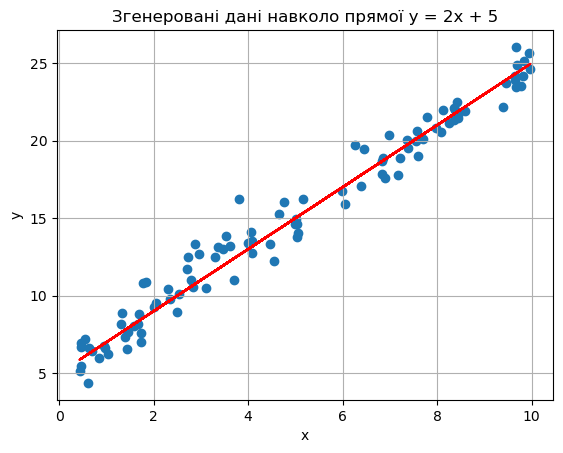

In [17]:
k = 2
b = 5

x = np.random.uniform(0, 10, 100)

# шум для y
noise = np.random.normal(0,1,100)

# y = kx + b + шум
y = k * x + b + noise

plt.scatter(x, y)
#plt.scatter(x, k * x + b, color='red') 

plt.plot(x, k * x + b, color='red')  # Додавання прямої y = kx + b для порівняння
plt.xlabel('x')
plt.ylabel('y')
plt.title('Згенеровані дані навколо прямої y = {}x + {}'.format(k, b))
plt.grid(True)
plt.show()


<font size="4">**2)Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k та b.**</font>

In [18]:
def least_squares(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x**2)
    sum_xy = np.sum(x*y)

    k_ls = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x**2)
    b_ls = (sum_y - k * sum_x) / n

    return k_ls, b_ls

k_ls, b_ls = least_squares(x, y)
print("Оптимальні оцінки k та b:", k_ls, b_ls)


Оптимальні оцінки k та b: 1.955883072493308 5.125201716638256


<font size="4">**3)Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).**</font>

In [19]:

k_polyfit, b_polyfit = np.polyfit(x, y, 1)
print("Оцінка за np.polyfit")
print("k :", k_polyfit)
print("b:", b_polyfit)
print("----------------------------------")

print("оцінка за методом найменших квадратів")
print("k:", k_ls)
print("b:", b_ls)
print("----------------------------------")

print("оригінальні параметри")
print("k:", k)
print("b:", b)
print("----------------------------------")

def compare_params(k1, b1, k2, b2):
        k_diff = abs(k1 - k2) / k1 * 100
        b_diff = abs(b1 - b2) / b1 * 100
        print(f"k ={k_diff}, b = {b_diff}")

print()
print("polyfit and least squares:")
compare_params(k_polyfit, b_polyfit, k_ls, b_ls)
print("---------------------------------------")

print("polyfit and original:")
compare_params(k_polyfit, b_polyfit, k, b)
print("---------------------------------------")

print("mls and original:")
compare_params(k_ls, b_ls, k, b)
print("---------------------------------------")

Оцінка за np.polyfit
k : 1.9558830724933094
b: 5.3419464576833375
----------------------------------
оцінка за методом найменших квадратів
k: 1.955883072493308
b: 5.125201716638256
----------------------------------
оригінальні параметри
k: 2
b: 5
----------------------------------

polyfit and least squares:
k =6.811591389519249e-14, b = 4.057411334277545
---------------------------------------
polyfit and original:
k =2.255601478796556, b = 6.401158461472689
---------------------------------------
mls and original:
k =2.255601478796626, b = 2.442864175117361
---------------------------------------


<font size="4">**4)Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.**</font>

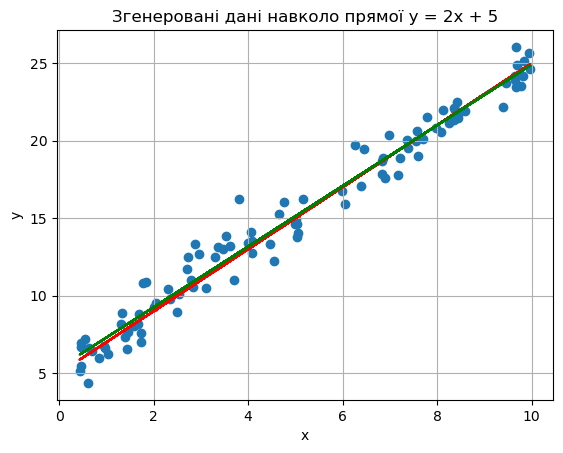

In [20]:
plt.scatter(x, y)

plt.plot(x, k * x + b, color='red') #original
plt.plot(x, k_polyfit* x + b_polyfit, color = "green")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Згенеровані дані навколо прямої y = {}x + {}'.format(k, b))
plt.grid(True)
plt.show()

<font size="4">**Завдання2
Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter**</font>

In [21]:
def gradient_descent(X, y, learning_rate=0.01, n_iter=1000, tolerance=1e-6):
    k = 0.0
    b = 0.0
    m = len(y)
    previous_error = float('inf')
    errors = []

    for i in range(n_iter):
        y_pred = k * X + b
        D_k = (-2/m) * np.sum(X * (y - y_pred))
        D_b = (-2/m) * np.sum(y - y_pred)
        
        k -= learning_rate * D_k
        b -= learning_rate * D_b
        
        current_error = np.mean((y - y_pred) ** 2)
        errors.append(current_error)
        
        if i % 100 == 0:
            print(f"Iteration {i}: MSE = {current_error}, k = {k}, b = {b}")
        
        if abs(previous_error - current_error) < treshhold:
            print(f"Збіжність досягнута на ітерації {i}.")
            break
        
        previous_error = current_error
    
    return k, b, errors

    
learning_rate = 0.01
n_iter = 1000
treshhold = 1e-6
    
k_grad, b_grad, errors = gradient_descent(x, y, learning_rate, n_iter, treshhold)
print(f"Оптимальні значення: k = {k_grad}, b = {b_grad}")
    





Iteration 0: MSE = 260.17634631838644, k = 1.8329205139259812, b = 0.2990224713995475
Iteration 100: MSE = 3.34108914155917, k = 2.3778046509410933, b = 2.493674844546155
Iteration 200: MSE = 1.8250428545326185, k = 2.200298703467149, b = 3.6919666058091445
Iteration 300: MSE = 1.3162899050679477, k = 2.0974709971595837, b = 4.38612697086403
Iteration 400: MSE = 1.1455632156496127, k = 2.0379037694979467, b = 4.788248247159259
Iteration 500: MSE = 1.0882709630731602, k = 2.003396974211857, b = 5.021193729197147
Iteration 600: MSE = 1.0690448993776305, k = 1.9834074771736572, b = 5.156137092805749
Iteration 700: MSE = 1.062593040555509, k = 1.9718277292275685, b = 5.234308651329649
Iteration 800: MSE = 1.060427933702656, k = 1.9651196783827318, b = 5.279592779416011
Iteration 900: MSE = 1.0597013698063413, k = 1.961233760800898, b = 5.305825494936386
Оптимальні значення: k = 1.958999649913984, b = 5.320907337024692


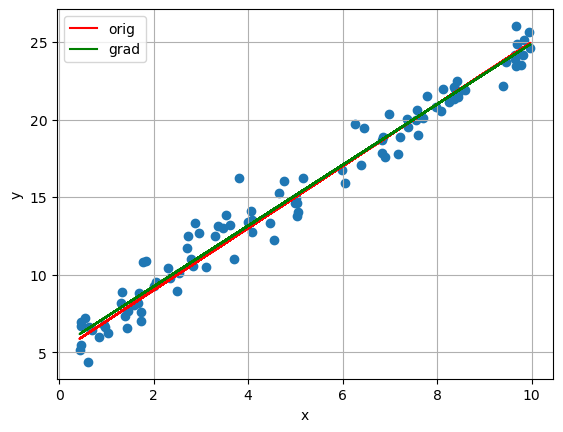

In [22]:
plt.scatter(x, y)

plt.plot(x, k * x + b, color='red', label = "orig") #
plt.plot(x, k_grad* x + b_grad, color = "green", label = "grad")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

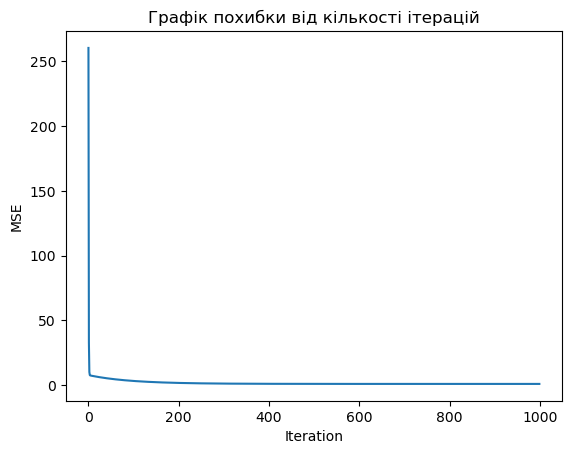

In [23]:
plt.plot(errors)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Графік похибки від кількості ітерацій')
plt.show()

In [24]:






print("polyfit and grad:")
compare_params(k_polyfit, b_polyfit, k_grad, b_grad)
print("----------------------------")

print("MLS and grad:")
compare_params(k_ls, b_ls, k_grad, b_grad)
print("----------------------------")

print("orig and grad:")
compare_params(k, b, k_grad, b_grad)
print("----------------------------")




polyfit and grad:
k =0.1593437493531539, b = 0.3938474641277083
----------------------------
MLS and grad:
k =0.15934374935322212, b = 3.8184959579464874
----------------------------
orig and grad:
k =2.050017504300805, b = 6.418146740493835
----------------------------
